In [1]:
import pandas as pd
import numpy as np
import os

In [5]:
cur_dir = os.getcwd()

In [11]:
data_list = os.listdir(cur_dir+'./data')
data_list

['2017~2022 사설학원수.csv',
 '2017~2022 초등학교 학생 수.csv',
 '4.2.15_시·군·구별_근로소득_연말정산_신고현황_주소지_2016_20230810140813.csv',
 'heabeop_좌표변환_최종.csv',
 'purunet - purunet (1).csv',
 '출처.txt',
 '학교급_및_시도별__학생_1인당_월평균_사교육비_20230811081450.csv']

In [12]:
Dataset = dict()

for data_name in data_list[:]:
    
    for encoding in ['cp949', 'utf-8']:
        try:
            Dataset[data_name[0:-4]] = pd.read_csv(cur_dir + f'/data/{data_name}', encoding=encoding)
            print(f"Successfully read {data_name} with encoding: {encoding}")
            break  # 읽기에 성공한 경우 반복문 종료
        except UnicodeDecodeError:
            print(f"Failed to read {data_name} with encoding: {encoding}")

Successfully read 2017~2022 사설학원수.csv with encoding: cp949
Successfully read 2017~2022 초등학교 학생 수.csv with encoding: cp949
Successfully read 4.2.15_시·군·구별_근로소득_연말정산_신고현황_주소지_2016_20230810140813.csv with encoding: cp949
Successfully read heabeop_좌표변환_최종.csv with encoding: cp949
Failed to read purunet - purunet (1).csv with encoding: cp949
Successfully read purunet - purunet (1).csv with encoding: utf-8
Failed to read 출처.txt with encoding: cp949


ParserError: Error tokenizing data. C error: Expected 4 fields in line 11, saw 5


# 초등학생수 데이터 전처리

In [13]:
df_1 = Dataset['2017~2022 초등학교 학생 수']

# [출처] 한국교육개발원, 2022, 2023.08.10, 초등학교 학생수(시도/시/군/구)

In [14]:
df_1 = df_1.drop([0])
df_1

,행정구역별,2017,2018,2019,2020,2021,2022
1,전국,9189413,8981562,8763576,8593199,8449890,8285220
2,서울특별시,1587612,1546841,1507375,1479479,1455703,1425037
3,종로구,60257,58800,57498,56258,55087,53537
4,중구,39008,38546,37968,37344,36209,34946
5,용산구,32769,31589,30400,29290,28532,27552
...,...,...,...,...,...,...,...
243,거창군,10768,10512,10110,9747,9415,9189
244,합천군,3249,3093,2943,2787,2648,2504
245,제주특별자치도,116963,116642,115489,113890,113479,85792
246,제주시,97083,96692,95829,94534,93747,91703


In [15]:
# 지역을 새로운 컬럼으로 만들어 주눈 코드
def region_new(df, col_name, loc, new_name ):
    data = df.copy()
    new_column = []
    current_area = None
    list_reg = ['전국','서울특별시', '부산광역시', '대구광역시', '인천광역시', 
                 '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', 
                 '경기도', '강원특별자치도', '충청북도', '충청남도', '전라북도', 
                 '전라남도', '경상북도', '경상남도', '제주특별자치도']
    for value in data[col_name]:
        if value in list_reg:
            current_area = value
            new_column.append(f'{value}')  
        else:
            new_value = f'{current_area}'
            new_column.append(new_value)
    # 새로운 컬럼을 데이터 프레임에 추가
    data.insert(loc, new_name, new_column)
    # 지역별 합산 데이터 제거
    data = data[~data['행정구역별'].isin(list_reg)]
    
    return data

In [16]:
df_stu = region_new(df_1, '행정구역별' ,0 ,'지역')


In [17]:

# 인덱스 초기화
df_stu=df_stu.reset_index(drop = True)


In [33]:

df_stu.to_csv('./pre_data/2017~2022 초등학교 학생 수.csv', index=False)
df_stu

,지역,행정구역별,2017,2018,2019,2020,2021,2022
0,서울특별시,종로구,60257,58800,57498,56258,55087,53537
1,서울특별시,중구,39008,38546,37968,37344,36209,34946
2,서울특별시,용산구,32769,31589,30400,29290,28532,27552
3,서울특별시,성동구,56128,55521,54277,52763,51649,50768
4,서울특별시,광진구,75173,73913,72904,71684,70450,69065
...,...,...,...,...,...,...,...,...
224,경상남도,함양군,3782,3610,3412,3270,3215,3124
225,경상남도,거창군,10768,10512,10110,9747,9415,9189
226,경상남도,합천군,3249,3093,2943,2787,2648,2504
227,제주특별자치도,제주시,97083,96692,95829,94534,93747,91703


# 사설학원수 데이터 전처리

In [19]:
df_2 = Dataset['2017~2022 사설학원수']

In [20]:
df_edu = region_new(df_2, '행정구역별' ,0 ,'지역')

In [21]:
df_edu = df_edu.drop([0])
df_edu

,지역,행정구역별,2017,2018,2019,2020,2021,2022
3,서울특별시,종로구,297,274,259,243,217,248
4,서울특별시,중구,128,119,118,109,91,108
5,서울특별시,용산구,175,158,155,154,137,151
6,서울특별시,성동구,295,314,293,289,290,294
7,서울특별시,광진구,442,430,406,405,426,441
...,...,...,...,...,...,...,...,...
242,경상남도,함양군,44,39,40,40,39,40
243,경상남도,거창군,84,85,78,79,83,86
244,경상남도,합천군,41,39,32,31,28,30
246,제주특별자치도,제주시,829,847,853,860,890,930


In [34]:
# 인덱스 초기화
df_edu=df_edu.reset_index(drop = True)
df_edu.to_csv('./pre_data/2017~2022 사설학원수.csv', index=False)
df_edu

,지역,행정구역별,2017,2018,2019,2020,2021,2022
0,서울특별시,종로구,297,274,259,243,217,248
1,서울특별시,중구,128,119,118,109,91,108
2,서울특별시,용산구,175,158,155,154,137,151
3,서울특별시,성동구,295,314,293,289,290,294
4,서울특별시,광진구,442,430,406,405,426,441
...,...,...,...,...,...,...,...,...
224,경상남도,함양군,44,39,40,40,39,40
225,경상남도,거창군,84,85,78,79,83,86
226,경상남도,합천군,41,39,32,31,28,30
227,제주특별자치도,제주시,829,847,853,860,890,930


# 연말정산 데이터 전처리

In [23]:
df_3 = Dataset['4.2.15_시·군·구별_근로소득_연말정산_신고현황_주소지_2016_20230810140813']

In [24]:
df_3=df_3.drop([0,1])

In [26]:
df_3 = df_3[~df_3['행정구역(시군구)별(2)'].isin(['소계'])]

In [27]:
df_3=df_3.reset_index(drop = True)
df_3

,행정구역(시군구)별(1),행정구역(시군구)별(2),2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
0,서울,강남구,201206,14142558,206821,14403588,209653,14926829,210941,15754700,215632,17477665
1,서울,강동구,160371,5824940,165248,6291291,183833,7447177,189102,7865918,192080,8488374
2,서울,강북구,102117,2764297,103391,2913526,105025,3075447,105321,3109922,105489,3274497
3,서울,강서구,236070,8221014,242516,8809099,245495,9178851,247909,9287969,252396,9964209
4,서울,관악구,205325,6098873,212016,6521099,217483,6865539,217065,6961669,224352,7550177
...,...,...,...,...,...,...,...,...,...,...,...,...
223,경남,함안군,22078,660556,21965,680748,21884,696932,21447,693680,20864,714257
224,경남,함양군,8904,254163,9153,272742,9343,288482,9374,300136,9506,311678
225,경남,합천군,9187,270618,9175,283536,9211,290330,9322,302771,9838,317420
226,제주,제주시,157011,4803882,164636,5213420,171469,5584793,173124,5730762,175810,6064037


In [28]:
# 이전 데이터들과 자치구 이름을 맞춰주기위한 코드
def change_region_name(region):
    region_mapping = {
        '서울': '서울특별시',
        '부산': '부산광역시',
        '대구': '대구광역시',
        '인천': '인천광역시',
        '광주': '광주광역시',
        '대전': '대전광역시',
        '울산': '울산광역시',
        '세종': '세종특별자치시',
        '경기': '경기도',
        '강원': '강원특별자치도',
        '충북': '충청북도',
        '충남': '충청남도',
        '전북': '전라북도',
        '전남': '전라남도',
        '경북': '경상북도',
        '경남': '경상남도',
        '제주': '제주특별자치도'
    }
    
    if region in region_mapping:
        return region_mapping[region]
    return region

In [29]:
df_3['행정구역(시군구)별(1)'] = df_3['행정구역(시군구)별(1)'].apply(change_region_name)

In [30]:
# 금여총계에서 인원수를 나누어주어 1인당 급여 평균을 나타내 준다
for i in range(2017,2022):
    df_3[f'{i}년 평균급여(백만원)']=(pd.to_numeric(df_3[f'{i}.1']) / pd.to_numeric(df_3[f'{i}']))

In [31]:
df_3=df_3.drop(['2017', '2017.1', '2018', '2018.1',
       '2019', '2019.1', '2020', '2020.1', '2021', '2021.1'], axis = 1)

In [35]:
df_3.to_csv('./pre_data/시·군·구별_근로소득_연말정산_신고현황_주소지.csv', index=False)
df_3

,행정구역(시군구)별(1),행정구역(시군구)별(2),2017년 평균급여(백만원),2018년 평균급여(백만원),2019년 평균급여(백만원),2020년 평균급여(백만원),2021년 평균급여(백만원)
0,서울특별시,강남구,70.288948,69.642773,71.197784,74.687709,81.053206
1,서울특별시,강동구,36.321654,38.071813,40.510556,41.596165,44.191868
2,서울특별시,강북구,27.069900,28.179687,29.282999,29.528033,31.041123
3,서울특별시,강서구,34.824476,36.323785,37.389157,37.465235,39.478474
4,서울특별시,관악구,29.703509,30.757580,31.568164,32.071817,33.653264
...,...,...,...,...,...,...,...
223,경상남도,함안군,29.919196,30.992397,31.846646,32.343918,34.233944
224,경상남도,함양군,28.544811,29.798099,30.876806,32.017922,32.787503
225,경상남도,합천군,29.456623,30.903106,31.519922,32.479189,32.264688
226,제주특별자치도,제주시,30.595831,31.666343,32.570278,33.102066,34.491991


# 2022년 평균급여 예측 모델 생성

In [179]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [180]:
df = df_3.copy()

In [181]:
def pred_avg(df, ind):
    data = np.array([df['2017년 평균급여(백만원)'][ind], df['2018년 평균급여(백만원)'][ind],
                     df['2019년 평균급여(백만원)'][ind], df['2020년 평균급여(백만원)'][ind],
                     df['2021년 평균급여(백만원)'][ind]])

    
    
    # 데이터 전처리 (모델학습을 위한 스케일 조정)
    data_normalized = (data - np.min(data)) / (np.max(data) - np.min(data))

    # 예측을 위해 4년치 데이터를 입력으로 사용(17~20년 X, 21년 y)
    time_steps = 4 

    X = []
    y = []
    for i in range(len(data_normalized) - time_steps):
        X.append(data_normalized[i:i+time_steps])
        y.append(data_normalized[i+time_steps])

    X = np.array(X)
    y = np.array(y)

    # 모델 생성
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(time_steps, 1)),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')
    
    # 모델 훈련
    model.fit(X.reshape(-1, time_steps, 1), y, epochs=100, verbose=0)  # verbose를 0으로 설정하여 출력 제거

    # 최근 4년치를 통해 다음 연도 값 예측
    last_data = data_normalized[-time_steps:]
    next_year_prediction = model.predict(np.array([last_data]))

    # 실제 데이터의 스케일로 복원
    predicted_value = next_year_prediction * (np.max(data) - np.min(data)) + np.min(data)

    return predicted_value


### 매번 예측모델을 돌리기엔 시간이 오래걸려 데이터를 저장 및 새로 불러옴

In [36]:
df = pd.read_csv("./pre_data/급여 2022 예측값.csv")

In [37]:
df[df['행정구역(시군구)별(1)']=='광주광역시']

,행정구역(시군구)별(1),행정구역(시군구)별(2),2017년 평균급여(백만원),2018년 평균급여(백만원),2019년 평균급여(백만원),2020년 평균급여(백만원),2021년 평균급여(백만원),2022년 평균급여_예측값(백만원)
115,광주광역시,광산구,32.910870,33.883924,34.794204,35.833613,37.383785,39.617447
116,광주광역시,남구,34.738983,36.159077,37.102379,38.034050,39.548014,42.153584
117,광주광역시,동구,33.435783,35.310270,36.370739,37.182448,39.354556,42.536842
118,광주광역시,북구,31.452545,32.392437,33.320902,34.140176,35.239432,36.990300
119,광주광역시,서구,35.289445,36.350680,37.301218,37.696259,39.230623,41.715610


c:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda

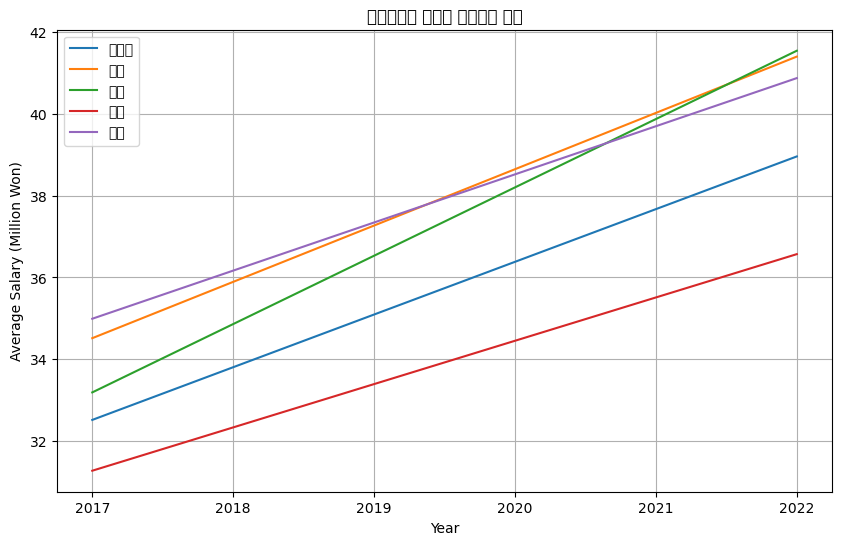

In [38]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 추세선 계산을 위한 연도 데이터
years = np.array([2017, 2018, 2019, 2020, 2021,2022])
df_3_A = df[df['행정구역(시군구)별(1)']=='광주광역시']



# 추세선 계산을 위한 함수 정의
def calculate_trend(data):
    model = LinearRegression()
    model.fit(years.reshape(-1, 1), data)
    return model.predict(years.reshape(-1, 1))

# 그래프 그리기
plt.figure(figsize=(10, 6))
for i, row in df_3_A.iterrows():
    trend_data = row[2:8]  # 2017년부터 2021년까지의 데이터
    trend_line = calculate_trend(trend_data)
    plt.plot(years, trend_line, label=row['행정구역(시군구)별(2)'])

plt.xlabel('Year')
plt.ylabel('Average Salary (Million Won)')
plt.title('광주광역시 동네별 평균급여 추이')
plt.legend()
plt.grid(True)
plt.show()

# 데이터 합치기

In [185]:
new_df = pd.merge(df_stu,df_edu,left_on =['지역','행정구역별'], right_on=['지역', '행정구역별'] )
new_df_3 = pd.merge(new_df,df,left_on =['지역','행정구역별'], right_on=['행정구역(시군구)별(1)', '행정구역(시군구)별(2)'], how = 'outer' )

In [186]:
new_df_3=new_df_3.drop(['행정구역(시군구)별(1)','행정구역(시군구)별(2)'], axis=1)

In [187]:
new_df_3.head(2)

,지역,행정구역별,2017_x,2018_x,2019_x,2020_x,2021_x,2022_x,2017_y,2018_y,2019_y,2020_y,2021_y,2022_y,2017년 평균급여(백만원),2018년 평균급여(백만원),2019년 평균급여(백만원),2020년 평균급여(백만원),2021년 평균급여(백만원),2022년 평균급여_예측값(백만원)
0,서울특별시,종로구,60257,58800,57498,56258,55087,53537,297,274,259,243,217,248,46.59,47.63,48.70,49.05,52.23,55.40
1,서울특별시,중구,39008,38546,37968,37344,36209,34946,128,119,118,109,91,108,43.24,44.89,46.20,47.32,49.50,51.57


In [188]:
# 결측치가 많은 데이터 제거(인천광역시)
new_df_3 = new_df_3[new_df_3.isnull().sum(axis=1) < 10]

### 데이터들을 보기 편하게 재정열

In [189]:
new_order = ['지역', '행정구역별', '2017_x','2017_y','2017년 평균급여(백만원)',
             '2018_x','2018_y','2018년 평균급여(백만원)','2019_x','2019_y','2019년 평균급여(백만원)',
             '2020_x','2020_y','2020년 평균급여(백만원)',
             '2021_x','2021_y','2021년 평균급여(백만원)','2022_x','2022_y','2022년 평균급여_예측값(백만원)']

In [190]:
new_df_3= new_df_3[new_order]

In [191]:
new_df_3.head(3)

,지역,행정구역별,2017_x,2017_y,2017년 평균급여(백만원),2018_x,2018_y,2018년 평균급여(백만원),2019_x,2019_y,2019년 평균급여(백만원),2020_x,2020_y,2020년 평균급여(백만원),2021_x,2021_y,2021년 평균급여(백만원),2022_x,2022_y,2022년 평균급여_예측값(백만원)
0,서울특별시,종로구,60257,297,46.59,58800,274,47.63,57498,259,48.70,56258,243,49.05,55087,217,52.23,53537,248,55.40
1,서울특별시,중구,39008,128,43.24,38546,119,44.89,37968,118,46.20,37344,109,47.32,36209,91,49.50,34946,108,51.57
2,서울특별시,용산구,32769,175,57.26,31589,158,58.85,30400,155,62.70,29290,154,64.92,28532,137,69.80,27552,151,75.40


### 2022년 데이터만 따로 빼와 분석

In [192]:
df_2022 = new_df_3[['지역','행정구역별','2022_x','2022_y','2022년 평균급여_예측값(백만원)']]

In [193]:
df_2022

,지역,행정구역별,2022_x,2022_y,2022년 평균급여_예측값(백만원)
0,서울특별시,종로구,53537,248,55.40
1,서울특별시,중구,34946,108,51.57
2,서울특별시,용산구,27552,151,75.40
3,서울특별시,성동구,50768,294,58.09
4,서울특별시,광진구,69065,441,43.27
...,...,...,...,...,...
224,경상남도,함양군,3124,40,34.54
225,경상남도,거창군,9189,86,34.76
226,경상남도,합천군,2504,30,33.63
227,제주특별자치도,제주시,91703,930,35.93


In [194]:
df_2022.columns= ['지역','행정구역별','초등학교 학생수','사설학원수(개)','평균 급여(백만원)']

In [195]:
# 문자형으로 잘못 표현된 데이터에 대해 숫자형으로 변환

df_2022['초등학교 학생수'] = pd.to_numeric(df_2022['초등학교 학생수'], errors='coerce')
df_2022['사설학원수(개)'] = pd.to_numeric(df_2022['사설학원수(개)'], errors='coerce')
df_2022['평균 급여(백만원)'] = pd.to_numeric(df_2022['평균 급여(백만원)'], errors='coerce')


C:\Users\user\AppData\Local\Temp\ipykernel_14616\3942111640.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_14616\3942111640.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_14616\3942111640.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

## 가중치 설정을 위해 중요도 분석


### 사교육비를 타켓으로 삼기위해 시도별 사교육비 평균보다 높은것을 1 낮은것을 1로 설정

In [280]:
df_expen = Dataset['학교급_및_시도별__학생_1인당_월평균_사교육비_20230811081450']
# 출처


In [197]:
df_expen=df_expen.drop([0,1])
df_expen=df_expen.drop(['2022'],axis=1)
df_expen['2022.1'] = pd.to_numeric(df_expen['2022.1'], errors='coerce')

In [198]:
average = df_expen['2022.1'].mean()
df_expen['2022.1'] = df_expen['2022.1'].apply(lambda x: 1 if x > average else 0)

In [199]:
df_expen['시도별'] = df_expen['시도별'].apply(lambda x: x.replace(' ',''))
df_expen['시도별'] = df_expen['시도별'].apply(change_region_name)

In [281]:
df_expen

,시도별,2022,2022.1
0,시도별,평 균 (만원),초등학교 (만원)
1,전 체,41.0,37.2
2,서 울,59.6,53.6
3,부 산,39.5,35.1
4,대 구,43.7,40.4
5,인 천,38.6,35.1
6,광 주,35.6,31.0
7,대 전,38.9,37.0
8,울 산,36.7,35.4
9,세 종,41.8,37.7


### 2022 데이터에 타켓데이터를 추가 

In [201]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report


In [202]:
df_2022['Target'] = df_2022['지역'].map(df_expen.set_index('시도별')['2022.1']).fillna(0)

C:\Users\user\AppData\Local\Temp\ipykernel_14616\3476654974.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [203]:
df_2022

,지역,행정구역별,초등학교 학생수,사설학원수(개),평균 급여(백만원),Target
0,서울특별시,종로구,53537.00,248.00,55.40,1
1,서울특별시,중구,34946.00,108.00,51.57,1
2,서울특별시,용산구,27552.00,151.00,75.40,1
3,서울특별시,성동구,50768.00,294.00,58.09,1
4,서울특별시,광진구,69065.00,441.00,43.27,1
...,...,...,...,...,...,...
224,경상남도,함양군,3124.00,40.00,34.54,0
225,경상남도,거창군,9189.00,86.00,34.76,0
226,경상남도,합천군,2504.00,30.00,33.63,0
227,제주특별자치도,제주시,91703.00,930.00,35.93,0


In [284]:
df_2022[df_2022['지역']=='울산광역시']

,지역,행정구역별,초등학교 학생수,사설학원수(개),평균 급여(백만원),Target,초등학교 학생수_scaled,사설학원수(개)_scaled,평균 급여(백만원)_scaled,가중합,순위,지역별 순위,지역별 학생수 순위
70,울산광역시,중구,23734.00,443.00,45.59,1,0.19,0.14,0.64,0.97,89.00,4.00,5.00
71,울산광역시,남구,54029.00,1012.00,48.74,1,0.43,0.32,0.68,1.44,41.00,1.00,1.00
72,울산광역시,동구,29415.00,274.00,41.82,1,0.24,0.09,0.59,0.91,96.00,5.00,4.00
73,울산광역시,북구,34119.00,454.00,47.91,1,0.27,0.15,0.67,1.09,68.00,2.00,2.00
74,울산광역시,울주군,32584.00,401.00,43.03,1,0.26,0.13,0.60,0.99,85.00,3.00,3.00


In [204]:
null_cnt_df = pd.DataFrame(df_2022.isnull().sum()).rename(columns = {0:'null_count'}).reset_index()
null_cnt_df['null_ratio'] = round(null_cnt_df['null_count']/len(df_2022) * 100, 2)
null_cnt_df

,index,null_count,null_ratio
0,지역,0,0.00
1,행정구역별,0,0.00
2,초등학교 학생수,1,0.44
3,사설학원수(개),1,0.44
4,평균 급여(백만원),2,0.87
5,Target,0,0.00


In [205]:
df_2022=df_2022.fillna(0)

In [206]:
null_cnt_df = pd.DataFrame(df_2022.isnull().sum()).rename(columns = {0:'null_count'}).reset_index()
null_cnt_df['null_ratio'] = round(null_cnt_df['null_count']/len(df_2022) * 100, 2)
null_cnt_df

,index,null_count,null_ratio
0,지역,0,0.00
1,행정구역별,0,0.00
2,초등학교 학생수,0,0.00
3,사설학원수(개),0,0.00
4,평균 급여(백만원),0,0.00
5,Target,0,0.00


### 모델학습을 통해 중요도 확인

In [207]:
X = df_2022.drop(['지역','행정구역별','Target'], axis = 1) # input 데이터
y = df_2022['Target'] # Target 데이터

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 777)

In [209]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X_train)
y = scaler.transform(X_test)

In [210]:
# 모델 불러오기, 정의
DT = DecisionTreeClassifier()
# 학습 데이터로 모델(Decision Tree) 학습
DT.fit(X_train, y_train) 


# 학습된 모델로 test 결과값 출력
y_pred = DT.predict(X_test) # X_test를 입력했을때 y예측값을 반환함

In [211]:
# 정확도
accuracy = round(accuracy_score(y_test, y_pred), 3)
# 정밀도
precision = round(precision_score(y_test, y_pred, average = 'macro'), 3)
# 재현율
recall = round(recall_score(y_test, y_pred, average = 'macro'), 3)

print('accuracy : ', accuracy, '\n',
      'precision : ', precision, '\n',
      'recall : ', recall)

accuracy :  0.674 
 precision :  0.66 
 recall :  0.663


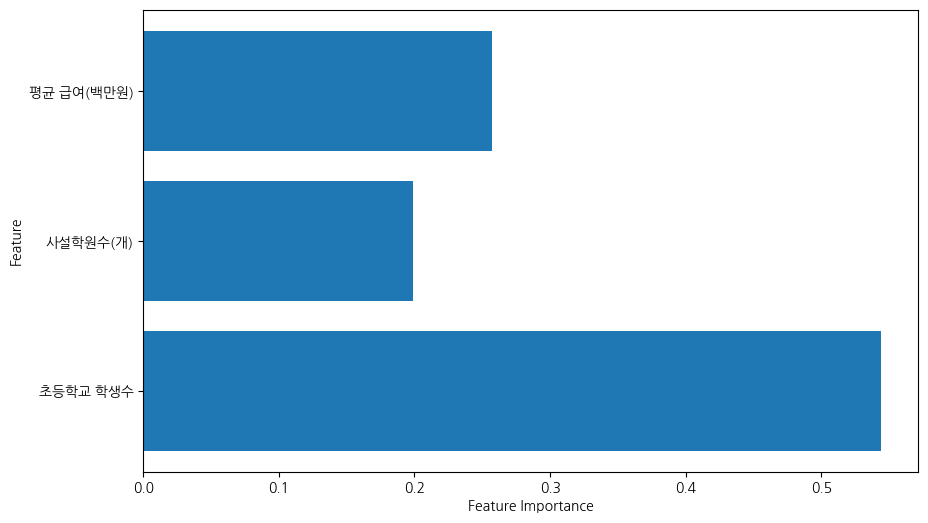

In [212]:
import koreanize_matplotlib
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
feature_importances = DT.feature_importances_

# 특성 이름 리스트 (만약 특성의 이름이 있다면)
feature_names = ['초등학교 학생수','사설학원수(개)','평균 급여(백만원)']  

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_importances)), feature_names)

plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

### 데이터들을 스케일링한 후 위에서 확인한 중요도에 맞춰 가중치를 주어 값을 계산한다.

In [213]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['초등학교 학생수', '사설학원수(개)', '평균 급여(백만원)']
weights = [1.5, 0.8, 1.2]
scaler = MinMaxScaler()
for i, col in enumerate(columns_to_scale):
    new_col_name = col + '_scaled'
    df_2022[new_col_name] = scaler.fit_transform(df_2022[[col]]) * weights[i]
    
df_2022['가중합'] = df_2022[[col + '_scaled' for col in columns_to_scale]].sum(axis=1)

In [214]:
# 가중합을 기준으로 하여 순위를 매긴다
df_2022['순위'] = df_2022['가중합'].rank(ascending=False, method='min')
# 지역별 가중합을 기준으로 순위
df_2022['지역별 순위'] = df_2022.groupby('지역')['가중합'].rank(ascending=False)
# 지역별 학생수를 기준으로 순위
df_2022['지역별 학생수 순위'] = df_2022.groupby('지역')['초등학교 학생수'].rank(ascending=False)

In [215]:
df_2022

,지역,행정구역별,초등학교 학생수,사설학원수(개),평균 급여(백만원),Target,초등학교 학생수_scaled,사설학원수(개)_scaled,평균 급여(백만원)_scaled,가중합,순위,지역별 순위,지역별 학생수 순위
0,서울특별시,종로구,53537.00,248.00,55.40,1,0.43,0.08,0.78,1.28,51.00,14.00,12.00
1,서울특별시,중구,34946.00,108.00,51.57,1,0.28,0.03,0.72,1.04,77.00,21.00,20.00
2,서울특별시,용산구,27552.00,151.00,75.40,1,0.22,0.05,1.06,1.32,45.00,11.00,23.00
3,서울특별시,성동구,50768.00,294.00,58.09,1,0.41,0.09,0.81,1.31,46.00,12.00,14.00
4,서울특별시,광진구,69065.00,441.00,43.27,1,0.55,0.14,0.61,1.30,49.00,13.00,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,경상남도,함양군,3124.00,40.00,34.54,0,0.02,0.01,0.48,0.52,195.00,12.00,14.00
225,경상남도,거창군,9189.00,86.00,34.76,0,0.07,0.03,0.49,0.59,150.00,9.00,9.00
226,경상남도,합천군,2504.00,30.00,33.63,0,0.02,0.01,0.47,0.50,216.00,17.00,16.00
227,제주특별자치도,제주시,91703.00,930.00,35.93,0,0.73,0.30,0.50,1.53,27.00,1.00,1.00


In [235]:
dff=df_2022[df_2022['순위']<100].groupby('지역').size()
dff= pd.DataFrame(dff)
dff = dff.reset_index(drop=False)

In [247]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
fig = px.pie(dff, values=0, names='지역')

fig.update_traces(textinfo='percent+label')
fig.show()

### 순위가 높은 일부 지역에 대해 시각화

In [217]:
import plotly.express as px
# 상위 n개 지역 중 특정 지역에 속하는 행정구역을 리스트로 만든다
top_2_ranked = df_2022[df_2022['지역별 순위'] < 4]
select_region=top_2_ranked[top_2_ranked['지역'].isin(['서울특별시','경기도','부산광역시','광주광역시'])]

# 각 지역별 상위 3개의 자치구에 대해 시각화를 진행한다.
df_data = select_region
fig = px.scatter_3d(df_data, x='초등학교 학생수_scaled', y='사설학원수(개)_scaled', z='평균 급여(백만원)_scaled',
              color='지역', symbol='행정구역별')
fig.show()

### 광주지역에 대해서만 실행 

In [277]:

select_region= df_2022[df_2022['지역'] == '광주광역시']

# 각 지역별 상위 3개의 자치구에 대해 시각화를 진행한다.
df_data = select_region
fig = px.scatter_3d(df_data, x='초등학교 학생수_scaled', y='사설학원수(개)_scaled', z='평균 급여(백만원)_scaled',
              color='지역', symbol='행정구역별')
fig.show()

In [253]:
df_2022_re=df_2022[['지역','행정구역별','초등학교 학생수','사설학원수(개)','평균 급여(백만원)','가중합','지역별 순위']]

In [282]:
df_2022_re[df_2022_re['지역']=='광주광역시'].sort_values(by='지역별 순위', ascending=True)

,지역,행정구역별,초등학교 학생수,사설학원수(개),평균 급여(백만원),가중합,지역별 순위
64,광주광역시,광산구,83424.00,940.00,39.62,1.52,1.00
63,광주광역시,북구,87880.00,930.00,36.99,1.52,2.00
62,광주광역시,남구,47231.00,632.00,42.15,1.17,3.00
61,광주광역시,서구,31728.00,718.00,41.72,1.07,4.00
60,광주광역시,동구,41068.00,304.00,42.54,1.02,5.00


# 시도별 데이터 재정렬

In [219]:
df_purunet = Dataset['purunet - purunet (1)']
df_heabeop = Dataset['heabeop_좌표변환_최종']

In [220]:
df_heabeop['지역'] = df_heabeop['주소'].apply(lambda x:x.split(' ')[0])
df_heabeop['행정구역별'] = df_heabeop['주소'].apply(lambda x:x.split(' ')[1])


In [221]:
df_heabeop['지역'] = df_heabeop['지역'].apply(change_region_name)

In [222]:
df_heabeop

,title,주소,Latitude,Longitude,지역,행정구역별
0,수원 광교SK레이크점,"경기 수원시 영통구 법조로 25 (하동, 광교 SK VIEW Lake)",37.29,127.06,경기도,수원시
1,스마트해법 북아현점,서울 서대문구 북아현동 180-27,37.56,126.95,서울특별시,서대문구
2,스마트해법수학 왕지점,"전남 순천시 연동남길 39 (조례동, 서영옥머리마당)",34.96,127.53,전라남도,순천시
3,DMC스마트해법학원,서울 서대문구 증가로 150 (남가좌동),37.57,126.92,서울특별시,서대문구
4,sk view,"서울 영등포구 여의대방로35가길 19 (신길동, 보라매 SK VIEW)",37.50,126.92,서울특별시,영등포구
...,...,...,...,...,...,...
2291,효자세븐팰리스점,"전북 전주시 완산구 호암로 75-11 (효자동2가, 7단지아파트상가)",35.81,127.10,전라북도,전주시
2292,효자포스코,전북 전주시 완산구 봉곡로 132,35.81,127.11,전라북도,전주시
2293,효천연세수학점,전북 전주시 완산구 효천서로 20,35.80,127.10,전라북도,전주시
2294,효천우미린2차점,전북 전주시 완산구 효천서로 20,35.80,127.10,전라북도,전주시


In [223]:
df_purunet['지역'] = df_purunet['주소'].apply(lambda x:x.split(' ')[0])
df_purunet['행정구역별'] = df_purunet['주소'].apply(lambda x:x.split(' ')[1])
df_purunet['지역'] = df_purunet['지역'].apply(change_region_name)

In [224]:
df_purunet

,title,주소,Latitude,Longitude,지번,지역,행정구역별
0,푸르넷공부방,경기 광명시 오리로 374,37.44,126.88,(지번) 소하동 1242-13,경기도,광명시
1,푸르넷 소하공부방,경기 광명시 소하일로52번길 29 102호,37.45,126.89,(지번) 소하동 1311-13,경기도,광명시
2,푸르넷공부방,경기 안양시 만안구 충훈로71번길 36,37.41,126.90,(지번) 석수동 782-9,경기도,안양시
3,푸르넷공부방,경기 안양시 만안구 충훈로 51 석수아이파크 109동,37.41,126.90,(지번) 석수동 794,경기도,안양시
4,푸르넷 수정공부방,경기 광명시 하안로 364 904동 804호,37.47,126.88,(지번) 하안동 13,경기도,광명시
...,...,...,...,...,...,...,...
313,서귀서초푸르넷공부방,제주특별자치도 서귀포시 솜반천로 31,33.25,126.56,(지번) 서홍동 444-1,제주특별자치도,서귀포시
314,푸르넷공부방 한림점,제주특별자치도 제주시 한림읍 한림로6길 23,33.41,126.26,(지번) 한림읍 한림리 1454-15,제주특별자치도,제주시
315,한천빌라푸르넷공부방,제주특별자치도 제주시 용남1길 42-24 102호,33.51,126.51,(지번) 용담일동 262-9,제주특별자치도,제주시
316,푸르넷위미초공부방,제주특별자치도 서귀포시 남원읍 태위로 68 2층,33.27,126.65,(지번) 남원읍 위미리 3126-1,제주특별자치도,서귀포시


In [225]:
df_ranked1 = df_2022.copy()

In [226]:
# 새로운 컬럼 초기값 0으로
df_ranked1['해법수학 수'] = 0
df_ranked1['푸르넷 공부방 수'] = 0

In [227]:
# 행정구역별 개수
for index, row in df_ranked1.iterrows():
    matching_rows = df_heabeop[(df_heabeop['행정구역별'] == row['행정구역별']) & (df_heabeop['지역'] == row['지역'])]
    count = len(matching_rows)
    df_ranked1.at[index, '해법수학 수'] = count
    
for index, row in df_ranked1.iterrows():
    matching_rows = df_purunet[(df_purunet['행정구역별'] == row['행정구역별']) & (df_purunet['지역'] == row['지역'])]
    count = len(matching_rows)
    df_ranked1.at[index, '푸르넷 공부방 수'] = count

In [228]:
df_ranked1

,지역,행정구역별,초등학교 학생수,사설학원수(개),평균 급여(백만원),Target,초등학교 학생수_scaled,사설학원수(개)_scaled,평균 급여(백만원)_scaled,가중합,순위,지역별 순위,지역별 학생수 순위,해법수학 수,푸르넷 공부방 수
0,서울특별시,종로구,53537.00,248.00,55.40,1,0.43,0.08,0.78,1.28,51.00,14.00,12.00,2,0
1,서울특별시,중구,34946.00,108.00,51.57,1,0.28,0.03,0.72,1.04,77.00,21.00,20.00,3,0
2,서울특별시,용산구,27552.00,151.00,75.40,1,0.22,0.05,1.06,1.32,45.00,11.00,23.00,4,0
3,서울특별시,성동구,50768.00,294.00,58.09,1,0.41,0.09,0.81,1.31,46.00,12.00,14.00,14,0
4,서울특별시,광진구,69065.00,441.00,43.27,1,0.55,0.14,0.61,1.30,49.00,13.00,7.00,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,경상남도,함양군,3124.00,40.00,34.54,0,0.02,0.01,0.48,0.52,195.00,12.00,14.00,0,0
225,경상남도,거창군,9189.00,86.00,34.76,0,0.07,0.03,0.49,0.59,150.00,9.00,9.00,1,0
226,경상남도,합천군,2504.00,30.00,33.63,0,0.02,0.01,0.47,0.50,216.00,17.00,16.00,0,0
227,제주특별자치도,제주시,91703.00,930.00,35.93,0,0.73,0.30,0.50,1.53,27.00,1.00,1.00,10,19


In [229]:
df_ranked1=df_ranked1[['지역','행정구역별','초등학교 학생수','지역별 순위','지역별 학생수 순위','해법수학 수', '푸르넷 공부방 수']]
df_ranked1

,지역,행정구역별,초등학교 학생수,지역별 순위,지역별 학생수 순위,해법수학 수,푸르넷 공부방 수
0,서울특별시,종로구,53537.00,14.00,12.00,2,0
1,서울특별시,중구,34946.00,21.00,20.00,3,0
2,서울특별시,용산구,27552.00,11.00,23.00,4,0
3,서울특별시,성동구,50768.00,12.00,14.00,14,0
4,서울특별시,광진구,69065.00,13.00,7.00,11,0
...,...,...,...,...,...,...,...
224,경상남도,함양군,3124.00,12.00,14.00,0,0
225,경상남도,거창군,9189.00,9.00,9.00,1,0
226,경상남도,합천군,2504.00,17.00,16.00,0,0
227,제주특별자치도,제주시,91703.00,1.00,1.00,10,19


In [237]:
grouped_heabeop = df_ranked1.groupby('지역')['해법수학 수'].sum()
grouped_stu = df_ranked1.groupby('지역')['초등학교 학생수'].sum()
grouped_purunet = df_ranked1.groupby('지역')['푸르넷 공부방 수'].sum()
grouped_purunet_stu = df_ranked1.groupby('지역')['초등학교 학생수'].sum()
# 지역과 행정구역별 해법수학 수 비율 계산 후 새로운 열로 추가
df_ranked1['행정구역별 학생수 비율'] = df_ranked1.apply(lambda x: round(x['초등학교 학생수']*100 / grouped_stu[x['지역']],3), axis=1)
df_ranked1['행정구역별 해법수학 비율'] = df_ranked1.apply(lambda x: round(x['해법수학 수']*100 / grouped_heabeop[x['지역']],3), axis=1)

df_ranked1['행정구역별 푸르넷 공부방 비율'] = df_ranked1.apply(lambda x: round(x['푸르넷 공부방 수']*100 / grouped_purunet[x['지역']],3), axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_14616\3328421333.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_14616\3328421333.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_14616\3328421333.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [238]:
df_ranked1

,지역,행정구역별,초등학교 학생수,지역별 순위,지역별 학생수 순위,해법수학 수,푸르넷 공부방 수,행정구역별 학생수 비율,행정구역별 해법수학 비율,행정구역별 푸르넷 공부방 비율
0,서울특별시,종로구,53537.00,14.00,12.00,2,0,3.76,0.52,0.00
1,서울특별시,중구,34946.00,21.00,20.00,3,0,2.45,0.78,0.00
2,서울특별시,용산구,27552.00,11.00,23.00,4,0,1.93,1.04,0.00
3,서울특별시,성동구,50768.00,12.00,14.00,14,0,3.56,3.63,0.00
4,서울특별시,광진구,69065.00,13.00,7.00,11,0,4.85,2.85,0.00
...,...,...,...,...,...,...,...,...,...,...
224,경상남도,함양군,3124.00,12.00,14.00,0,0,0.62,0.00,0.00
225,경상남도,거창군,9189.00,9.00,9.00,1,0,1.82,0.63,0.00
226,경상남도,합천군,2504.00,17.00,16.00,0,0,0.50,0.00,0.00
227,제주특별자치도,제주시,91703.00,1.00,1.00,10,19,82.06,66.67,57.58


In [ ]:
df_ranked1.groupby('')

In [243]:
# 지역별 점유율 비교를 위한 정의 함수
def rank_share(region_val):
    df_region = df_ranked1[df_ranked1['지역']== region_val]
    
    df_region['당사 비율에 따른 순위'] = df_region['행정구역별 해법수학 비율'].rank(ascending=False, method='min')
    df_region['경쟁사 비율에 따른 순위'] = df_region['행정구역별 푸르넷 공부방 비율'].rank(ascending=False, method='min')

    df_region=df_region[['지역', '행정구역별', '초등학교 학생수','행정구역별 학생수 비율', 
                         '행정구역별 해법수학 비율', '행정구역별 푸르넷 공부방 비율','지역별 순위',
                         '당사 비율에 따른 순위', '경쟁사 비율에 따른 순위']].sort_values(by='지역별 순위', ascending=True)
    
    
    return df_region.rename_axis(index=None)

In [263]:
df_rank_광주 = rank_share('부산광역시')
df_rank_광주

C:\Users\user\AppData\Local\Temp\ipykernel_14616\3742868374.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_14616\3742868374.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,지역,행정구역별,초등학교 학생수,행정구역별 학생수 비율,행정구역별 해법수학 비율,행정구역별 푸르넷 공부방 비율,지역별 순위,당사 비율에 따른 순위,경쟁사 비율에 따른 순위
31,부산광역시,남구,76591.00,14.04,5.16,0.00,1.00,9.00,6.00
33,부산광역시,해운대구,47384.00,8.68,7.10,30.00,2.00,5.00,1.00
35,부산광역시,금정구,66238.00,12.14,3.87,20.00,3.00,12.00,2.00
29,부산광역시,부산진구,63945.00,11.72,17.42,0.00,4.00,1.00,6.00
34,부산광역시,사하구,57760.00,10.59,10.97,0.00,5.00,2.00,6.00
30,부산광역시,동래구,32820.00,6.01,7.10,10.00,6.00,5.00,5.00
32,부산광역시,북구,31852.00,5.84,10.32,0.00,7.00,3.00,6.00
39,부산광역시,사상구,47837.00,8.77,4.52,0.00,8.00,11.00,6.00
36,부산광역시,강서구,22217.00,4.07,5.81,0.00,9.00,8.00,6.00
37,부산광역시,연제구,21824.00,4.00,7.10,20.00,10.00,5.00,2.00


In [ ]:
on_mapping = {
        '서울': '서울특별시',
        '부산': '부산광역시',
        '대구': '대구광역시',
        '인천': '인천광역시',
        '광주': '광주광역시',
        '대전': '대전광역시',
        '울산': '울산광역시',
        '세종': '세종특별자치시',
        '경기': '경기도',
        '강원': '강원특별자치도',
        '충북': '충청북도',
        '충남': '충청남도',
        '전북': '전라북도',
        '전남': '전라남도',
        '경북': '경상북도',
        '경남': '경상남도',
        '제주': '제주특별자치도'

In [285]:
df_rank_서울 = rank_share('울산광역시')
df_rank_서울

C:\Users\user\AppData\Local\Temp\ipykernel_14616\3742868374.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_14616\3742868374.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,지역,행정구역별,초등학교 학생수,행정구역별 학생수 비율,행정구역별 해법수학 비율,행정구역별 푸르넷 공부방 비율,지역별 순위,당사 비율에 따른 순위,경쟁사 비율에 따른 순위
71,울산광역시,남구,54029.00,31.07,31.25,35.71,1.00,2.00,1.00
73,울산광역시,북구,34119.00,19.62,37.50,7.14,2.00,1.00,4.00
74,울산광역시,울주군,32584.00,18.74,12.50,7.14,3.00,4.00,4.00
70,울산광역시,중구,23734.00,13.65,18.75,21.43,4.00,3.00,3.00
72,울산광역시,동구,29415.00,16.92,0.00,28.57,5.00,5.00,2.00
